In [1]:
import pandas as pd
import numpy as np
import numpy.core.defchararray as npd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',1000000)

organ_offers = pd.read_csv("/Users/johnwang/OneLegacy/data/data-csv/organoffers.csv", low_memory = False)

In [145]:
import matplotlib.pyplot as plt

In [124]:
not_k = organ_offers[organ_offers.match_organ != "KI"]
not_k = not_k[not_k.match_organ != "KP"]
start = not_k.loc[:, ["donor_id", "datetime_match_run", "match_organ"]]

test1 = start.groupby("donor_id").agg("min")

data = not_k.merge(test1, how = "left", on = "donor_id")

In [118]:
data = data.loc[(data.offer_accepted == "Y") & (data.datetime_refusal_entered < data.donor_cross_clamp_datetime), :]

In [119]:
data.count()

Unnamed: 0                                      308
donor_id                                        308
match_organ                                     308
match_id                                        308
sequence_number_on_match_run                    308
offer_accept_sequence_number                    308
donor_dcd                                       308
donor_age_in_months                             308
donor_age_in_years                              308
donor_increased_risk_status                     308
donor_abo                                       308
donor_gender                                    308
donor_hcv_status                                308
donor_height_in_cm                              308
donor_weight_in_kg                              308
donor_kdpi                                      308
donor_match_kdpi                                  0
donor_pf_ratio                                  308
donor_pf_ratio_group                            308
donor_cross_

In [6]:
organ_offers.loc[accept_inds, :].match_id.nunique()

738

In [130]:

test2 = start.groupby("donor_id").agg("max")

In [131]:
test3 = test1.merge(test2, how = "left", on = "donor_id")
test3 = test3[test3.datetime_match_run_y>test3.datetime_match_run_x]
# test3 = test3.loc[~((test3.match_organ_y == "LU")), :]

In [132]:
test3["diff"] = (pd.to_datetime(test3["datetime_match_run_y"]) - pd.to_datetime(test3["datetime_match_run_x"])).dt.total_seconds()

In [133]:
test3["diff"].mean()

80457.84864864865

In [134]:
test3.match_organ_x.value_counts()

HL    101
IN     50
HR     30
LI      4
Name: match_organ_x, dtype: int64

In [135]:
test3.match_organ_y.value_counts()

LU    125
LI     60
Name: match_organ_y, dtype: int64

(array([21., 11.,  4., 12.,  4.,  2.,  5.,  0.,  0.,  1.]),
 array([9.200000e+01, 1.970830e+04, 3.932460e+04, 5.894090e+04,
        7.855720e+04, 9.817350e+04, 1.177898e+05, 1.374061e+05,
        1.570224e+05, 1.766387e+05, 1.962550e+05]),
 <a list of 10 Patch objects>)

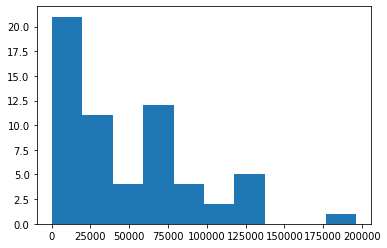

In [146]:
plt.hist(test3.loc[test3.match_organ_y == "LI", "diff"])

(array([19., 10., 23., 23., 16., 13., 11.,  2.,  3.,  5.]),
 array([1.10000e+01, 2.59920e+04, 5.19730e+04, 7.79540e+04, 1.03935e+05,
        1.29916e+05, 1.55897e+05, 1.81878e+05, 2.07859e+05, 2.33840e+05,
        2.59821e+05]),
 <a list of 10 Patch objects>)

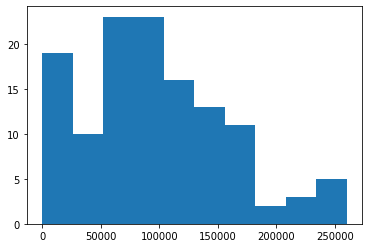

In [147]:
plt.hist(test3.loc[test3.match_organ_y == "LU", "diff"])

In [115]:
organ_offers.donor_id.nunique()

565

In [27]:
start = not_k.loc[:, ["donor_id", "datetime_match_run", "match_organ"]]
start = start.drop_duplicates()

In [28]:
t1 = start.merge(start, how = "left", on = "donor_id")

In [31]:
start.head()

,donor_id,datetime_match_run,match_organ
0,AGIC169,2019-09-04 23:24:25,IN
94,AGIC169,2019-09-04 23:24:25,LI
5993,AGIC211,2019-09-04 15:09:47,LI
6210,AGC1095,2019-03-29 21:45:17,HL
6232,AGC1095,2019-03-29 04:41:14,IN


In [33]:
t2 = t1.loc[t1.datetime_match_run_x< t1.datetime_match_run_y, :]

In [34]:
t2.count()

donor_id                660
datetime_match_run_x    660
match_organ_x           660
datetime_match_run_y    660
match_organ_y           660
dtype: int64

In [37]:
t2.match_organ_x.value_counts()

IN    442
LU     93
HL     87
LI     25
HR     13
Name: match_organ_x, dtype: int64

In [58]:
t2["diff"] = (pd.to_datetime(t2["datetime_match_run_y"]) - pd.to_datetime(t2["datetime_match_run_x"])).dt.total_seconds()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
t2.head()

,donor_id,datetime_match_run_x,match_organ_x,datetime_match_run_y,match_organ_y,diff
7,AGC1095,2019-03-29 21:45:17,HL,2019-03-30 04:16:06,LI,23449.0
9,AGC1095,2019-03-29 04:41:14,IN,2019-03-29 21:45:17,HL,61443.0
11,AGC1095,2019-03-29 04:41:14,IN,2019-03-30 04:16:06,LI,84892.0
12,AGC1095,2019-03-29 04:41:14,IN,2019-03-29 21:45:17,LU,61443.0
19,AGC1095,2019-03-29 21:45:17,LU,2019-03-30 04:16:06,LI,23449.0


In [64]:
t2["diff"].mean()

66152.14393939394